In [1]:
%matplotlib inline
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from lda import LDA, _doc_update, _slice_doc_update

# Generate some data:
V = 1000
M = 500
numwords = 40
K = 5
alpha = 1./5
lmda = 1./2

#Top down LDA data
X = sp.coo_matrix((M, V)).tolil()
beta = np.zeros((K, V))
for k in range(K):
    beta[k, :] = np.random.dirichlet(np.ones(V)*lmda)
for d in range(M):
    theta_d = np.random.dirichlet(np.ones(K)*alpha)
    zs = np.random.choice(np.arange(K), size=numwords, p=theta_d)
    for z in zs:
        w_n = np.random.choice(np.arange(V), p=beta[z, :])
        X[d, w_n] += 1



No collapsing
Epoch 0
-129738.865197
Epoch 1
-128819.569151
Epoch 2
-128337.178526
Epoch 3
-128045.292671
Epoch 4
-127837.347215
Epoch 5
-127665.849449
Epoch 6
-127549.663863
Epoch 7
-127447.712401
Epoch 8
-127360.36963
Epoch 9
-127291.21195
Epoch 10
-127233.351456
Epoch 11
-127178.994752
Epoch 12
-127133.262574
Epoch 13
-127086.252734
Epoch 14
-127041.110439
Epoch 15
-126999.10199
Epoch 16
-126959.811934
Epoch 17
-126920.744892
Epoch 18
-126881.939246
Epoch 19
-126846.229382
CPU times: user 4min 29s, sys: 1.14 s, total: 4min 30s
Wall time: 4min 30s


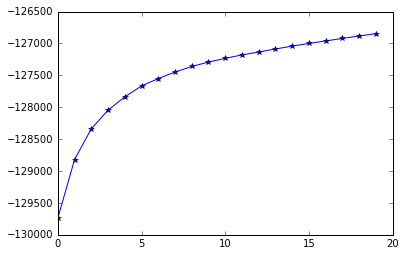

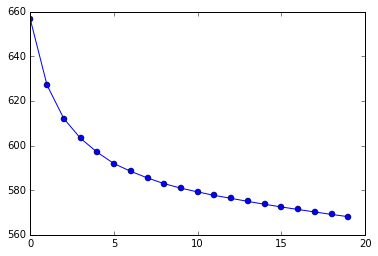

Collapsed theta, not beta
Epoch 0
-129732.698687
Epoch 1
-128704.053732
Epoch 2
-128183.129354
Epoch 3
-127857.474597
Epoch 4
-127634.342156
Epoch 5
-127457.252578
Epoch 6
-127322.370374
Epoch 7
-127203.795119
Epoch 8
-127107.641027
Epoch 9
-127023.315291
Epoch 10
-126955.149019
Epoch 11
-126895.612982
Epoch 12
-126840.807233
Epoch 13
-126796.036714
Epoch 14
-126752.903586
Epoch 15
-126715.537779
Epoch 16
-126683.777216
Epoch 17
-126652.945061
Epoch 18
-126623.97755
Epoch 19
-126597.23827
CPU times: user 8min 7s, sys: 1.8 s, total: 8min 8s
Wall time: 8min 12s


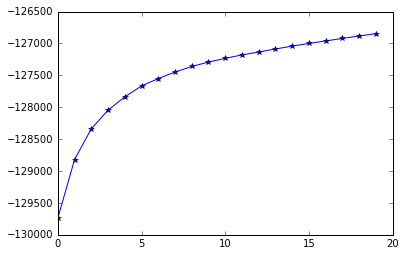

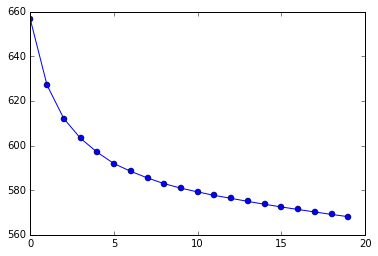

All collapsed
Epoch 0
-127284.008414
Epoch 1
-126922.6305
Epoch 2
-126738.457721
Epoch 3
-126620.588855
Epoch 4
-126520.089351
Epoch 5
-126435.484746
Epoch 6
-126352.568352
Epoch 7
-126279.208768
Epoch 8
-126201.867788
Epoch 9
-126125.443111
Epoch 10
-126044.312057
Epoch 11
-125961.689119
Epoch 12
-125873.749476
Epoch 13
-125780.871853
Epoch 14
-125685.237809
Epoch 15
-125593.652846
Epoch 16
-125500.646154
Epoch 17
-125410.868768
Epoch 18
-125319.930339
Epoch 19
-125231.487118
CPU times: user 8min 19s, sys: 2.28 s, total: 8min 21s
Wall time: 8min 26s


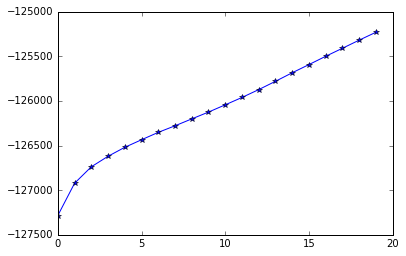

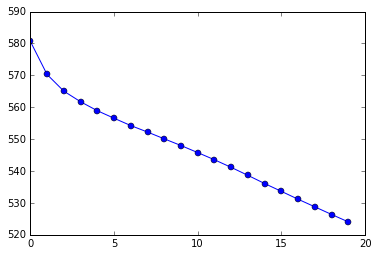

In [3]:
lda = LDA(alpha=alpha, lmda=lmda, nr_em_epochs=20)

print "No collapsing"
%time props, word_props, log_Xs, perp = lda.gibbs_sample(X)
plt.plot(range(len(log_Xs)), log_Xs, '*-')
plt.show()

plt.plot(range(len(perp)), perp, 'o-')
plt.show()

print "Collapsed theta, not beta"
%time props1, word_props1, log_Xs1, perp1 = lda.collapsed_theta_gibbs_sample(X)
plt.plot(range(len(log_Xs)), log_Xs, '*-')
plt.show()

plt.plot(range(len(perp)), perp, 'o-')
plt.show()

print "All collapsed"
%time props2, word_props2, log_Xs2, perp2 = lda.collapsed_gibbs_sample(X)
plt.plot(range(len(log_Xs2)), log_Xs2, '*-')
plt.show()

plt.plot(range(len(perp2)), perp2, 'o-')
plt.show()

In [ ]:
plt.plot(log_Xs, "o-", label="Full Gibbs")
plt.plot(log_Xs1, "o-", label="Collapsed $\\theta$")
plt.plot(log_Xs2, "o-", label="Fully Collapsed")
plt.ylabel("$\log p(X)$")
plt.xlabel("Epochs")
plt.title("Log Evidence")
plt.legend(loc=6)

In [ ]:
plt.plot(perp, "o-", label="Full Gibbs")
plt.plot(perp1, "o-", label="Collapsed $\\theta$")
plt.plot(perp2, "o-", label="Fully Collapsed")
plt.ylabel("Perplexity")
plt.xlabel("Epochs")
plt.title("Perplexity")
plt.legend(loc=6)

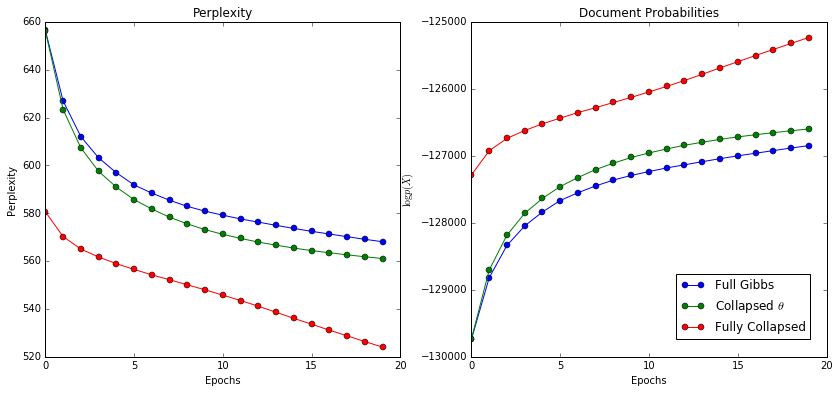

In [4]:
f, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(perp, "o-", label="Full Gibbs")
ax[0].plot(perp1, "o-", label="Collapsed $\\theta$")
ax[0].plot(perp2, "o-", label="Fully Collapsed")
ax[0].set_ylabel("Perplexity")
ax[0].set_xlabel("Epochs")
ax[0].set_title("Perplexity")

ax[1].plot(log_Xs, "o-", label="Full Gibbs")
ax[1].plot(log_Xs1, "o-", label="Collapsed $\\theta$")
ax[1].plot(log_Xs2, "o-", label="Fully Collapsed")
ax[1].set_ylabel("$\log p(X)$")
ax[1].set_xlabel("Epochs")
ax[1].set_title("Log Evidence")

handles, labels = ax[0].get_legend_handles_labels()
f.legend(handles, labels, bbox_to_anchor=(0, 0.2, 0.81, 0.), loc=5)